The dataset drug_safety.csv was obtained from Hbiostat courtesy of the Vanderbilt University Department of Biostatistics. It contained five adverse effects: headache, abdominal pain, dyspepsia, upper respiratory infection, chronic obstructive airway disease (COAD), demographic data, vital signs, lab measures, etc. The ratio of drug observations to placebo observations is 2 to 1.

For this project, the dataset has been modified to reflect the presence and absence of adverse effects adverse_effects and the number of adverse effects in a single individual num_effects.

The goal is to know if the adverse reactions, if any, are of significant proportions.

The columns in the modified dataset are:

Column Description:

sex - The gender of the individual
age - The age of the individual
week - The week of the drug testing
trx - The treatment (Drug) and control (Placebo) groups
wbc - The count of white blood cells
rbc - The count of red blood cells
adverse_effects - The presence of at least a single adverse effect
num_effects - The number of adverse effects experienced by a single individual

In [ ]:
! pip install pingouin

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drug_safety.csv')
df

,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
0,62,male,Drug,0,7.3,5.1,No,0
1,62,male,Drug,1,NaN,NaN,No,0
2,62,male,Drug,12,5.6,5.0,No,0
3,62,male,Drug,16,NaN,NaN,No,0
4,62,male,Drug,2,6.6,5.1,No,0
...,...,...,...,...,...,...,...,...
16098,78,male,Placebo,16,NaN,NaN,Yes,1
16099,78,male,Placebo,2,7.5,4.9,No,0
16100,78,male,Placebo,20,NaN,NaN,Yes,1
16101,78,male,Placebo,4,6.4,4.8,No,0


In [ ]:
# Getting the count of successes of adverse_effects
adverse = df.groupby("trx")['adverse_effects'].value_counts()
adverse

trx      adverse_effects
Drug     No                 9703
         Yes                1024
Placebo  No                 4864
         Yes                 512
Name: count, dtype: int64

In [ ]:
# Getting the total counts of adverse effects
adverse_totalcounts = adverse.groupby("trx").sum()
adverse_totalcounts

trx
Drug       10727
Placebo     5376
Name: count, dtype: int64

In [ ]:
# Performing a two-sample proportion z-test
n_success = np.array([1024,512])
n_total_observation = np.array([10727,5376])
z_score , p_value = proportions_ztest(count=n_success, nobs=n_total_observation, alternative= 'two-sided')
z_score, p_value

(0.0452182684494942, 0.9639333330262475)

Interpretation of Results:

z-Score (0.0452): This indicates a small deviation from the expected proportions. A z-score close to zero suggests that the observed proportions are close to what you would expect by random chance.

p-Value (0.9639): This is relatively large, suggesting that the observed difference in proportions is likely due to random chance. A p-value above the common significance level (e.g., 0.05) indicates that you do not have strong evidence to reject the null hypothesis.

Conclusion:

Based on the results, there is not enough evidence to reject the null hypothesis. The proportions of adverse effects in the two groups are not significantly different, and any observed difference is likely due to random variability.



Performing Chi-squared test to find out if number of adverse effects is independent of the treatment and control groups

In [ ]:
# Determining if num_effects and trx are independent
expected, observed, stats = pingouin.chi2_independence(data=df, x="num_effects", y="trx")
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  1.799644  3.0  0.615012  0.010572  0.176275
1        cressie-read  0.666667  1.836006  3.0  0.607131  0.010678  0.179153
2      log-likelihood  0.000000  1.922495  3.0  0.588648  0.010926  0.186033
3       freeman-tukey -0.500000  2.001752  3.0  0.572043  0.011149  0.192379
4  mod-log-likelihood -1.000000  2.096158  3.0  0.552690  0.011409  0.199984
5              neyman -2.000000  2.344303  3.0  0.504087  0.012066  0.220189


Interpretation of chi-squared test:

Overall, across multiple chi-squared tests, the p-values are consistently not low enough to reject the null hypothesis of independence. Therefore, based on these tests, there is no strong evidence to suggest a significant association between the variables "num_effects" and "trx".

In [ ]:
# Select the age of the Drug group
age_trx = df.loc[df["trx"] == "Drug", "age"]
age_trx

0        62
1        62
2        62
3        62
4        62
         ..
16074    60
16075    60
16092    68
16093    68
16094    68
Name: age, Length: 10727, dtype: int64

In [ ]:
# Select the age of the Placebo group
age_placebo = df.loc[df["trx"] == "Placebo", "age"]
age_placebo

32       73
33       73
34       73
35       73
36       73
         ..
16098    78
16099    78
16100    78
16101    78
16102    78
Name: age, Length: 5376, dtype: int64

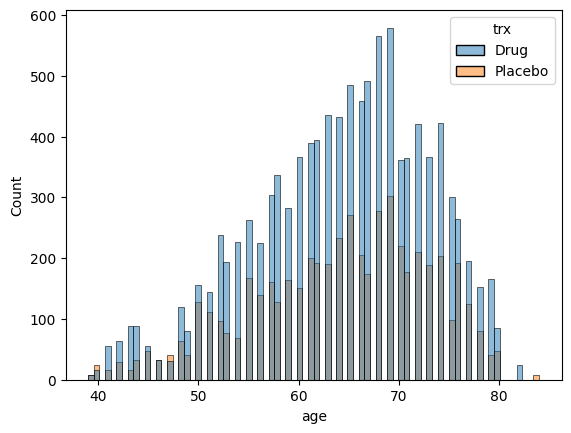

In [ ]:
# Visualizing distribution of ages between two groups
sns.histplot(data=df, x="age", hue="trx", bins = 80)
plt.show()

The histograms being similar suggests that there is an overlap in the age ranges of individuals in the Drug and Placebo groups. This implies that individuals with similar ages are present in both treatment groups.

The data distribution is not normal.

In [ ]:
# Conducting a two-sided Mann-Whitney U test
age_group_effects = pingouin.mwu(age_trx, age_placebo)
age_group_effects

,U-val,alternative,p-val,RBC,CLES
MWU,29149339.5,two-sided,0.256963,-0.01093,0.505465


This is a Mann-Whitney U test statistic, which measures the difference in ranks between the groups. Larger values indicate greater differences in rankings.

alternative: Indicates the alternative hypothesis used for the test. In this case, it's "two-sided," meaning the test is checking for any difference between the groups.

p-val (p-value): The p-value associated with the test. This is a key value for determining statistical significance. In this case, the p-value is 0.256963.

RBC (Rank-Biserial Correlation): A measure of effect size for the Mann-Whitney U test. It indicates the strength and direction of the relationship between the groups. In this case, the RBC is -0.01093.

CLES (Common Language Effect Size): CLES represents the probability that a randomly selected value from one group will be greater than a randomly selected value from the other group. It ranges from 0 to 1. In this case, the CLES is 0.505465.

Interpretation:

The p-value (0.256963) is greater than a common significance level (e.g., 0.05). Therefore, based on this test, there is not enough evidence to reject the null hypothesis that there is no difference between the distributions of age_trx and age_placebo.

The Rank-Biserial Correlation (RBC) is close to zero, suggesting a very small effect size.

The Common Language Effect Size (CLES) is approximately 0.505, indicating that there is a 50.5% chance that a randomly selected value from age_trx is greater than a randomly selected value from age_placebo.

In summary, based on this Mann-Whitney U test, there is no significant difference between the distributions of age_trx and age_placebo. The effect size is small, and the probability of superiority (CLES) is close to 50%, indicating a lack of a clear trend in one direction.